Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva

## Strojno učenje 1 2022/2023

http://www.fer.unizg.hr/predmet/struce1


---

### Prva laboratorijska vježba: Linearna regresija

_Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021._

(c) 2015-2022 Jan Šnajder, Domagoj Alagić

Rok za predaju: **23. listopada 2022. u 23:59h**

---


### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija.

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.


In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija


Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

print(X)
print(y)

[[0]
 [1]
 [2]
 [4]]
[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane _dummy_ jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

dm = PolynomialFeatures(1).fit_transform(X)
dm

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 4.]])

### (b)


Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).


In [4]:
from operator import matmul
from numpy import array_equal, linalg

dm_T = dm.transpose()
x_plus = matmul(linalg.inv(matmul(dm_T, dm)), dm_T)
w = matmul(x_plus, y)
w_pinv = matmul(linalg.pinv(dm), y)

print(w)
print(w_pinv)


[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom _dummy_ jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.


### (c)


Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?


In [5]:
import numpy as np
from sklearn.metrics import mean_squared_error

w = np.asarray(w)
w_T = w.transpose()
h = np.dot(dm, w_T)
print(h)

mse = mean_squared_error(y, h)
mse

[2.2        2.65714286 3.11428571 4.02857143]


2.0428571428571427

### (d)


Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.


In [6]:
try:
    w_d = linalg.inv(dm)
except:
    print('Matrica nije kvadratna pa nema inverz.')

Matrica nije kvadratna pa nema inverz.


### (e)


Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.


In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(dm, y)

w = np.array([reg.intercept_, reg.coef_[1]])
print(w)

h = reg.predict(dm)
print(h)

mse2 = mean_squared_error(y, h)
mse2

[2.2        0.45714286]
[2.2        2.65714286 3.11428571 4.02857143]


2.042857142857143

### 2. Polinomijalna regresija i utjecaj šuma


### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum $\sigma=200$:


In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return f(X) + normal(0, noise, X.shape)

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x : 5 + x - 2*x**2 - 5*x**3, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).


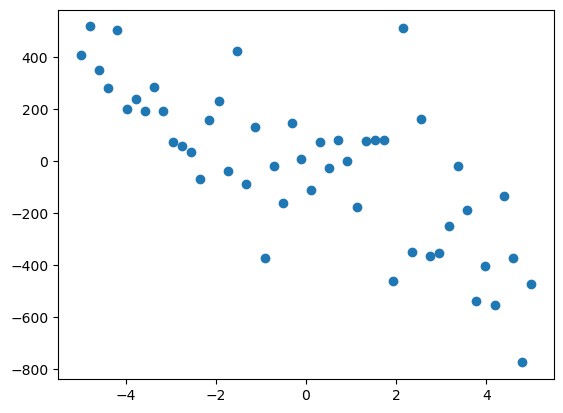

In [11]:
plt.scatter(X, y)

### (b)


Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.


33486.48446404681

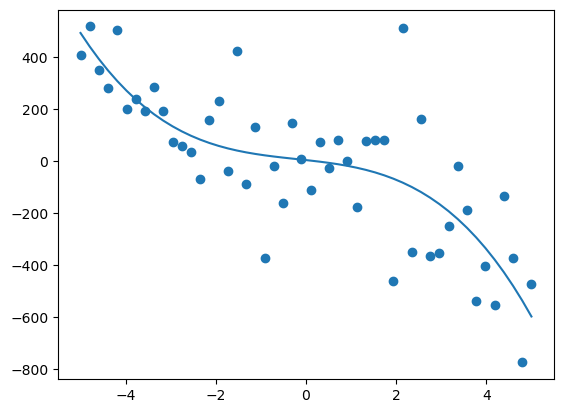

In [12]:
poly = PolynomialFeatures(3)
dm = poly.fit_transform(X)

w = matmul(linalg.pinv(dm), y)
h = matmul(dm, w)

plt.scatter(X, y)
plt.plot(X, h)

mse = mean_squared_error(y, h)
mse

### 3. Odabir modela


### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?


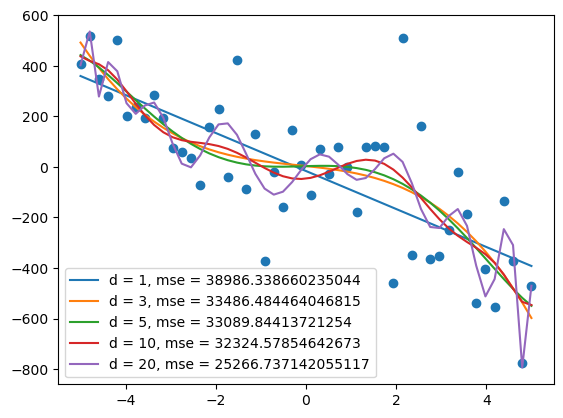

In [13]:
deg = [1,3,5,10,20]

plt.figure()
plt.scatter(X, y)

for d in deg:
    poly = PolynomialFeatures(d)
    dm = poly.fit_transform(X)
    model = LinearRegression().fit(dm, y)
    h = model.predict(dm)
    mse = mean_squared_error(y, h)
    
    plt.plot(X, h, label="d = {}, mse = {}".format(d, mse))

plt.legend()

### (b)


Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?


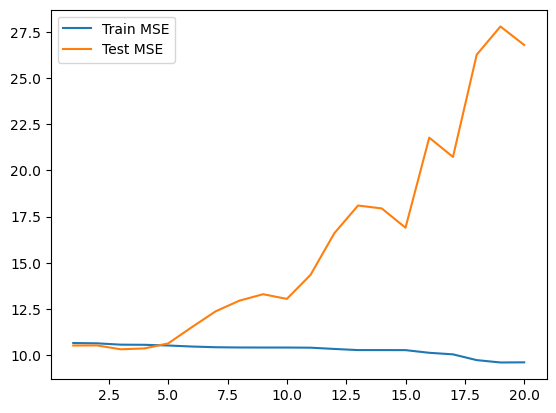

In [14]:
from numpy import append
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

deg = []
for i in range(1, 21):
    deg.append(i)

train_mse = []
test_mse = []
for d in deg:
    poly = PolynomialFeatures(d)

    dm_train = poly.fit_transform(X_train)
    dm_test = poly.fit_transform(X_test)

    model = LinearRegression().fit(dm_train, y_train)
    h = model.predict(dm_train)
    predicted = model.predict(dm_test)

    train_mse.append(mean_squared_error(y_train, h))
    test_mse.append(mean_squared_error(y_test, predicted))

plt.plot(deg, np.log(train_mse), label="Train MSE")
plt.plot(deg, np.log(test_mse), label="Test MSE")

plt.legend()

### (c)


Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.


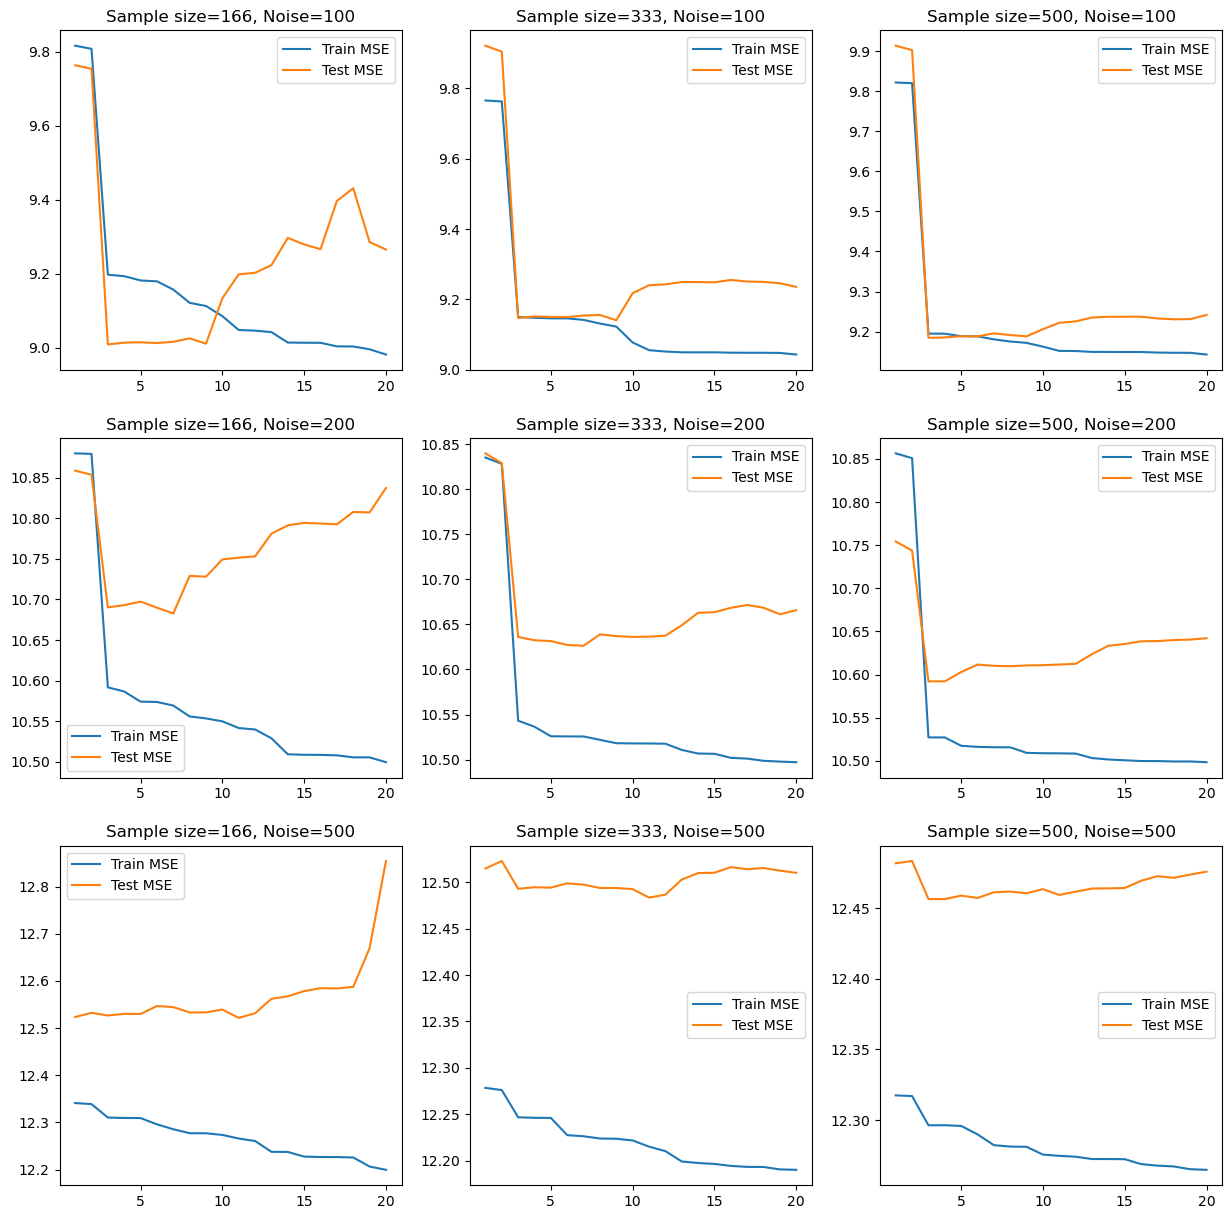

In [15]:
X = make_instances(-5, 5, 1000)
X_train, X_test = train_test_split(X, test_size=0.5)

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(15, 15)

N = 500
N_sizes = [int((1/3)*N), int((2/3)*N), N]

noise = [100, 200, 500]

for n in range(len(noise)):
    y_train = make_labels(X_train, lambda x : 5 + x - 2*x**2 - 5*x**3, noise[n])
    y_test = make_labels(X_test, lambda x : 5 + x - 2*x**2 - 5*x**3, noise[n])

    for size in range(len(N_sizes)):
        X_train_sample = X_train[:N_sizes[size]]
        X_test_sample = X_test[:N_sizes[size]]
        y_train_sample = y_train[:N_sizes[size]]
        y_test_sample = y_test[:N_sizes[size]]

        train_mse = []
        test_mse = []

        for d in deg:
            poly = PolynomialFeatures(d)

            dm_train_sample = poly.fit_transform(X_train_sample)
            dm_test_sample = poly.fit_transform(X_test_sample)

            model = LinearRegression().fit(dm_train_sample, y_train_sample)
            h = model.predict(dm_train_sample)
            predicted = model.predict(dm_test_sample)

            train_mse.append(mean_squared_error(y_train_sample, h))
            test_mse.append(mean_squared_error(y_test_sample, predicted))
    
        axs[n, size].plot(deg, np.log(train_mse), label="Train MSE")
        axs[n, size].plot(deg, np.log(test_mse), label="Test MSE")
        axs[n, size].set_title("Sample size=%d, Noise=%d" % (N_sizes[size], noise[n]))
        axs[n, size].legend()


**_Q:_** Jesu li rezultati očekivani? Obrazložite.


### 4. Regularizirana regresija


### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. _ridge regression_), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.


In [16]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
fi = PolynomialFeatures(3).fit_transform(X)

unit_mat = np.identity(len(fi))
unit_mat[0][0] = 0
lam = [0, 1, 10]
fi_T = fi.transpose()

for l in lam:
    fi_plus = matmul(linalg.inv(np.add(matmul(fi_T, fi), l*unit_mat)), fi_T)
    w = matmul(fi_plus, y)
    print(w)


[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)


Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.


In [17]:
from sklearn.linear_model import Ridge

for l in lam:
    clf = Ridge(l)
    clf.fit(fi, y)
    w = clf.coef_
    w[0] = clf.intercept_
    print(w)
    

[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.


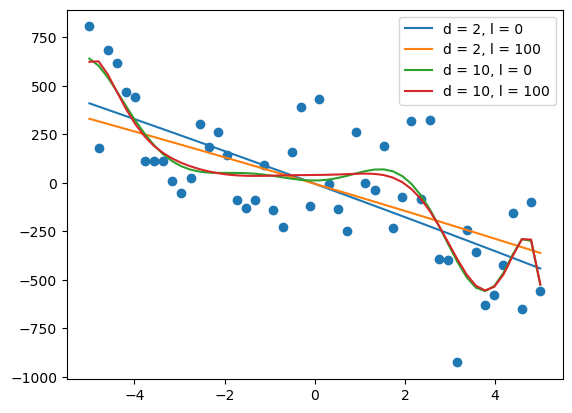

In [18]:
lam = [0, 100]
deg = [2, 10]

X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x : 5 + x - 2*x**2 - 5*x**3, 200)

fig = plt.figure()
plt.scatter(X, y)

for d in deg:
    for l in lam:
        fi = PolynomialFeatures(d).fit_transform(X)
        clf = Ridge(l).fit(fi, y)
        h = clf.predict(fi)
        
        plt.plot(X, h, label="d = {}, l = {}".format(d, l))

plt.legend()



### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


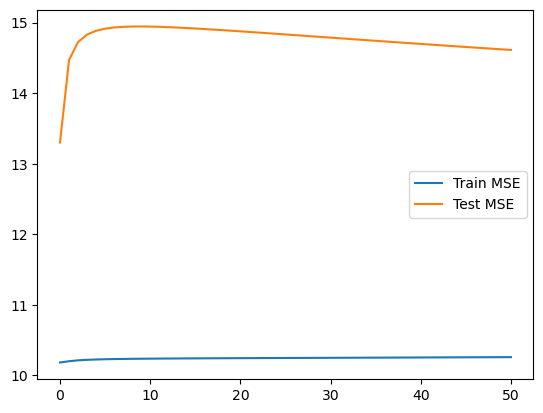

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

lam = range(0, 51)

poly = PolynomialFeatures(10)
fi_train = poly.fit_transform(X_train)
fi_test = poly.fit_transform(X_test)

train_mse = []
test_mse = []

for l in lam:
    clf = Ridge(l).fit(fi_train, y_train)
    h = clf.predict(fi_train)
    predicted = clf.predict(fi_test)

    train_mse.append(mean_squared_error(y_train, h))
    test_mse.append(mean_squared_error(y_test, predicted))

plt.plot(lam, np.log(train_mse), label="Train MSE")
plt.plot(lam, np.log(test_mse), label="Test MSE")

plt.legend()

### 5. L1-regularizacija i L2-regularizacija


Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:


In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?


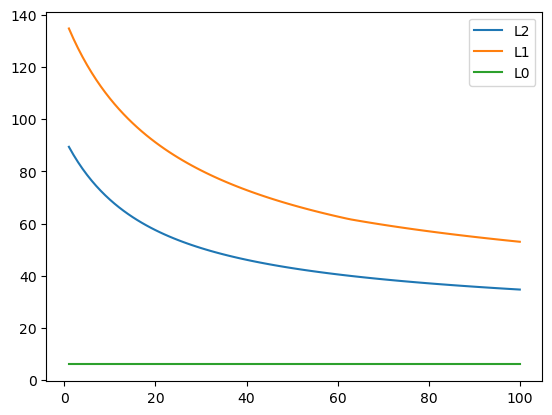

In [21]:
import numpy
from sklearn.linear_model import Ridge

X = make_instances(-5, 5, 50)
y = make_labels(X, lambda x : 5 + x - 2*x**2 - 5*x**3, 200)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

fi = PolynomialFeatures(5).fit_transform(X)

lam = range(1, 101)
fi_T = fi.transpose()
unit_mat = np.identity(len(fi_T))
unit_mat[0][0] = 0

L2 = np.array([])
L1 = np.array([])
L0 = np.array([])

for l in lam:
    fi_plus = matmul(linalg.inv(np.add(matmul(fi_T, fi), l*unit_mat)), fi_T)
    w = matmul(fi_plus, y)
    w_T = w.transpose()
    
    L2 = np.append(L2, np.sqrt(matmul(w_T, w)))
    L1 = np.append(L1, sum(abs(w)))
    L0 = np.append(L0, nonzeroes(w))

plt.plot(lam, L2, label='L2')
plt.plot(lam, L1, label='L1')
plt.plot(lam, L0, label='L0')

plt.legend()


### (b)


Glavna prednost L1-regularizirane regresije (ili _LASSO regression_) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. _sparse models_), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).


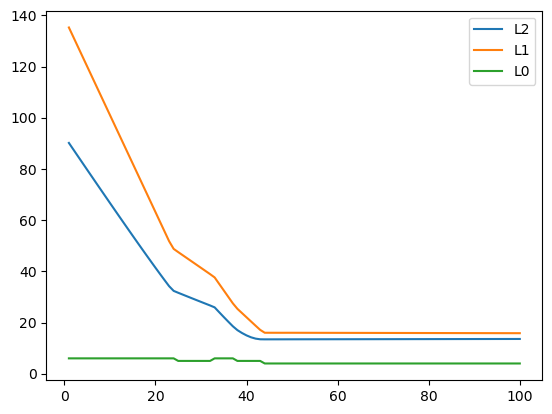

In [22]:
from sklearn.linear_model import Lasso

L2 = np.array([])
L1 = np.array([])
L0 = np.array([])

for l in lam:
    h = Lasso(l).fit(fi, y)
    w = h.coef_
    w[0] = h.intercept_
    w_T = w.transpose()

    L2 = np.append(L2, np.sqrt(matmul(w_T, w)))
    L1 = np.append(L1, sum(abs(w)))
    L0 = np.append(L0, nonzeroes(w))

plt.plot(lam, L2, label='L2')
plt.plot(lam, L1, label='L1')
plt.plot(lam, L0, label='L0')

plt.legend()

### 6. Značajke različitih skala


Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.


In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)


Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.


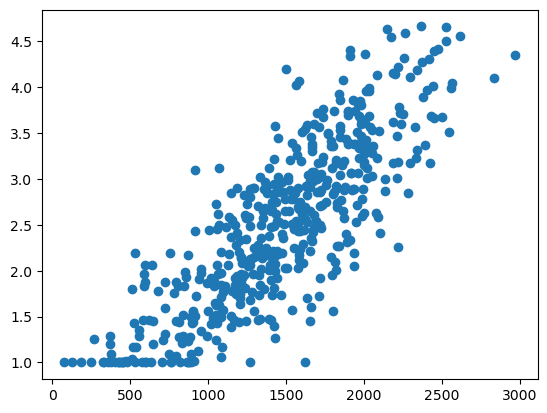

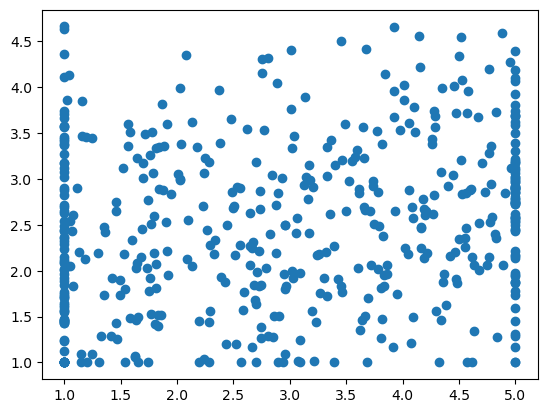

In [24]:
plt.figure()
plt.scatter(exam_score, grades_y)

plt.figure()
plt.scatter(grade_in_highschool, grades_y)

### b)


Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:


In [25]:
clf = Ridge(0.01).fit(grades_X, grades_y)
predicted = clf.predict(grades_X)
clf.coef_

array([0.00141497, 0.09477276])

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).


In [26]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()
grades_X_fixed = scaler_X.fit_transform(grades_X)
grades_y_fixed = scaler_y.fit_transform(grades_y.reshape(-1, 1))

clf = Ridge(0.01).fit(grades_X_fixed, grades_y_fixed)
predicted = clf.predict(grades_X_fixed)
clf.coef_

array([[0.81630375, 0.15167761]])

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.


### 7. Multikolinearnost


### a)


Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka _7b_ duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.


In [27]:
grades_X_fixed_colinear = np.hstack((grades_X_fixed, np.tile(grades_X_fixed[:, [-1]], 1)))

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).


In [28]:
clf = Ridge(0.01).fit(grades_X_fixed_colinear, grades_y_fixed)
predicted = clf.predict(grades_X_fixed_colinear)
clf.coef_

array([[0.81630364, 0.07583957, 0.07583957]])

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku _7b_. Što se dogodilo?


### b)


Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata). Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).


In [29]:
w1_h1 = []
w2_h1 = []
w3_h1 = []

w1_h2 = []
w2_h2 = []
w3_h2 = []

for i in range(10):
    idx = np.random.randint(len(grades_X_fixed_colinear), size=int(len(grades_X_fixed_colinear)*0.5))
    rand_grades_X = grades_X_fixed_colinear[idx,:]
    rand_grades_y = grades_y_fixed[idx,:]

    h1 = (Ridge(0.01).fit(rand_grades_X, rand_grades_y)).coef_[0]
    h2 = (Ridge(1000).fit(rand_grades_X, rand_grades_y)).coef_[0]

    w1_h1.append(h1[0])
    w2_h1.append(h1[1])
    w3_h1.append(h1[2])

    w1_h2.append(h2[0])
    w2_h2.append(h2[1])
    w3_h2.append(h2[2])

    print('lambda = 0.01, h1 = {}'.format(h1))
    print('lambda = 1000, h2 = {}'.format(h2))


print()
print('lambda = 0.01')
print('w1 = {}'.format(np.std(w1_h1)))
print('w2 = {}'.format(np.std(w2_h1)))
print('w3 = {}'.format(np.std(w3_h1)))

print()
print('lambda = 1000')
print('w1 = {}'.format(np.std(w1_h2)))
print('w2 = {}'.format(np.std(w2_h2)))
print('w3 = {}'.format(np.std(w3_h2)))



lambda = 0.01, h1 = [0.78442614 0.05798842 0.05798842]
lambda = 1000, h2 = [0.17042548 0.05277113 0.05277113]
lambda = 0.01, h1 = [0.84185496 0.10853086 0.10853086]
lambda = 1000, h2 = [0.16606135 0.03682682 0.03682682]
lambda = 0.01, h1 = [0.80028869 0.09258294 0.09258294]
lambda = 1000, h2 = [0.16016355 0.02992725 0.02992725]
lambda = 0.01, h1 = [0.84406406 0.0516362  0.0516362 ]
lambda = 1000, h2 = [0.17531914 0.02508137 0.02508137]
lambda = 0.01, h1 = [0.78971539 0.07886073 0.07886073]
lambda = 1000, h2 = [0.16155553 0.03428091 0.03428091]
lambda = 0.01, h1 = [0.80237957 0.06556442 0.06556442]
lambda = 1000, h2 = [0.16091022 0.02379852 0.02379852]
lambda = 0.01, h1 = [0.84263554 0.06199831 0.06199831]
lambda = 1000, h2 = [0.16897212 0.02447929 0.02447929]
lambda = 0.01, h1 = [0.84846728 0.07953089 0.07953089]
lambda = 1000, h2 = [0.15569452 0.04243913 0.04243913]
lambda = 0.01, h1 = [0.807097   0.08006777 0.08006777]
lambda = 1000, h2 = [0.17085732 0.03982161 0.03982161]
lambda = 0

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.
